In [1]:
import os, glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#path
path_root = '/media/yassine/data_disk/data/HCP/SPM'

In [4]:
list_folder = glob.glob(os.path.join(path_root,'*'))

In [5]:
list_folder.remove(glob.glob(os.path.join(path_root,'*.nii.gz'))[0])

In [6]:
list_folder

['/media/yassine/data_disk/data/HCP/SPM/hcp_language_story_activation_maps_22-Feb-2017',
 '/media/yassine/data_disk/data/HCP/SPM/hcp_social_activation_maps_19-Aug-2017',
 '/media/yassine/data_disk/data/HCP/SPM/hcp_motor_activation_maps_19-Jun-2017',
 '/media/yassine/data_disk/data/HCP/SPM/hcp_relational_activation_maps_12-Jun-2017',
 '/media/yassine/data_disk/data/HCP/SPM/hcp_emotion_activation_maps_17-Jun-2017',
 '/media/yassine/data_disk/data/HCP/SPM/hcp_wm_activation_maps_24-Aug-2017',
 '/media/yassine/data_disk/data/HCP/SPM/hcp_gamb_activation_maps_18-Jun-2017']

In [8]:
list_folder = ['/media/yassine/data_disk/data/HCP/SPM/hcp_social_activation_maps_19-Aug-2017',
              '/media/yassine/data_disk/data/HCP/SPM/hcp_language_story_activation_maps_22-Feb-2017',
              '/media/yassine/data_disk/data/HCP/SPM/hcp_wm_activation_maps_24-Aug-2017',
              '/media/yassine/data_disk/data/HCP/SPM/hcp_relational_activation_maps_12-Jun-2017',
              '/media/yassine/data_disk/data/HCP/SPM/hcp_emotion_activation_maps_17-Jun-2017',
              '/media/yassine/data_disk/data/HCP/SPM/hcp_motor_activation_maps_19-Jun-2017',
              '/media/yassine/data_disk/data/HCP/SPM/hcp_gamb_activation_maps_18-Jun-2017']

In [9]:
df_all = pd.DataFrame()
for folder in list_folder:
    task_name = folder.split('/')[-1].split('_')[1]
    if task_name == 'gamb':
        task_name ='gambling' 
    
    df_ = pd.read_csv(os.path.join(folder,'corr_list_{}.csv'.format(task_name)))
    df_all = df_all.append(df_)

In [10]:
len(df_all.Condition.unique())

21

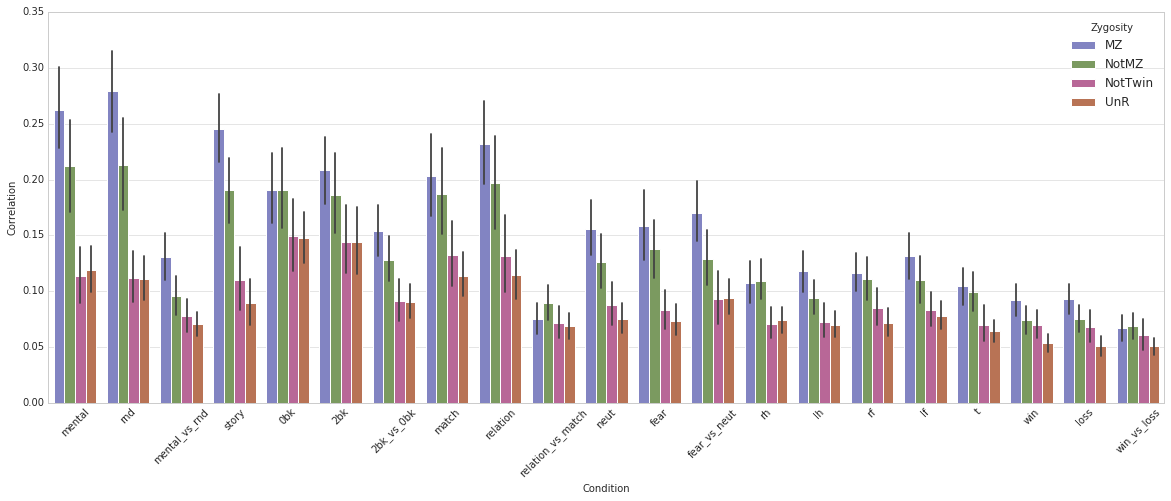

In [12]:
# color for each zygocity type
coll_ = ["#777acd",
         "#7aa456",
         "#c65999",
         "#c96d44"]
coll_list = coll_ * len(df_all.Condition.unique())

sns.set_style("whitegrid")
plt.figure(figsize=(20,7))
ax = sns.barplot(x='Condition', y='Correlation', palette=coll_list,hue = 'Zygosity',edgecolor='white',data=df_all)
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.savefig('/media/yassine/data_disk/Drive/HCP2/subtypes_scores/26-10-2016/Figures/spm_correlations/corr_all_task.svg')